# Parte 1

Se importan las librerías necesarias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Se define la función que grafica las imágenes:

In [2]:
def plot_comparativo(original, modified):
    plt.figure(figsize=(8, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Imagen original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title('Imagen transformada')
    plt.axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()


### Coordenadas cromáticas

Se define la función que transforma las imágenes a coordenadas cromáticas:

In [3]:
def img2coor_crom(image):
    float_image = np.float32(image) / 255
    
    R, G, B = cv2.split(float_image)
    sum_channels = R + G + B
    
    valid_mask = sum_channels != 0

    r = np.zeros_like(R)
    g = np.zeros_like(G)
    b = np.zeros_like(B)

    r[valid_mask] = R[valid_mask] / sum_channels[valid_mask]
    g[valid_mask] = G[valid_mask] / sum_channels[valid_mask]
    b[valid_mask] = B[valid_mask] / sum_channels[valid_mask]
    
    img_crom = cv2.merge((r * 255, g * 255, b * 255)).astype(np.uint8)
    
    return img_crom


Se leen las imágenes y se tranforman:

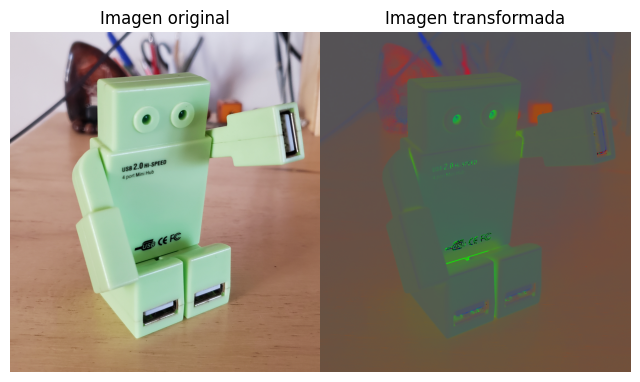

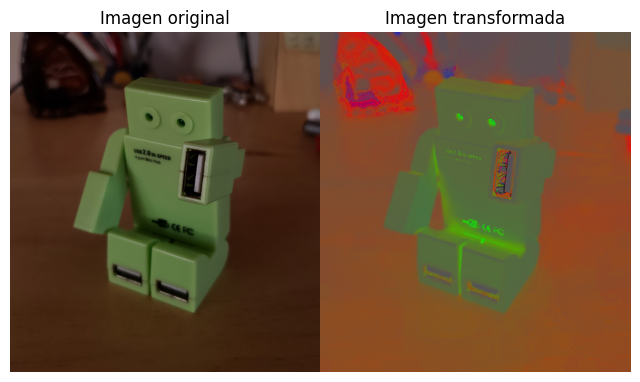

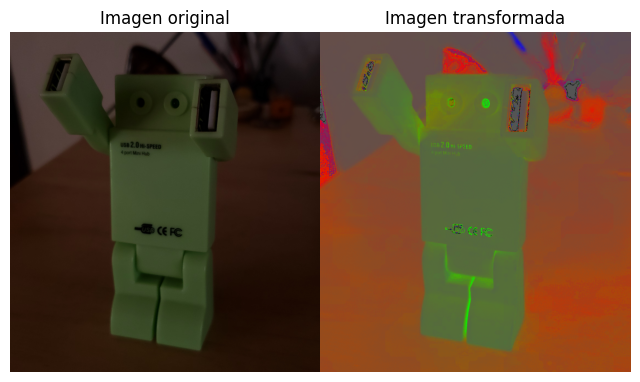

In [4]:
path = 'coord_cromaticas'
images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

for image_name in images:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)
    
    if image is not None:
        img_crom = img2coor_crom(image)
        plot_comparativo(image, img_crom)


### White patch

Se define la función que transforma las imágenes aplicando white patch:

In [5]:
def white_patch(image):
    float_image = np.float32(image) / 255
    
    R, G, B = cv2.split(float_image)
    R_max, G_max, B_max = R.max(), G.max(), B.max()
    
    R = R / R_max
    G = G / G_max
    B = B / B_max
    
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)
    
    corrected_image = cv2.merge((R * 255, G * 255, B * 255)).astype(np.uint8)
    
    return corrected_image


Se leen las imágenes y se tranforman:

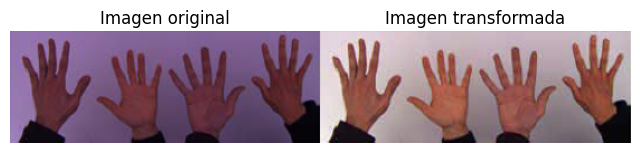

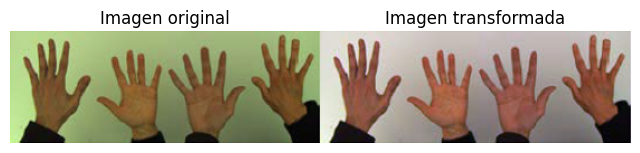

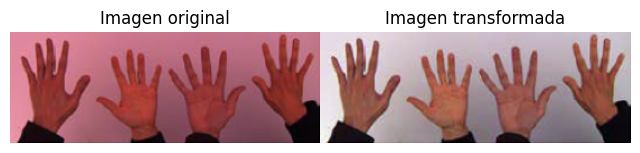

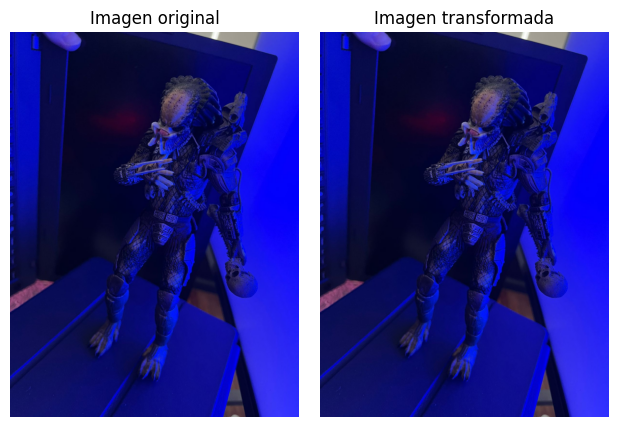

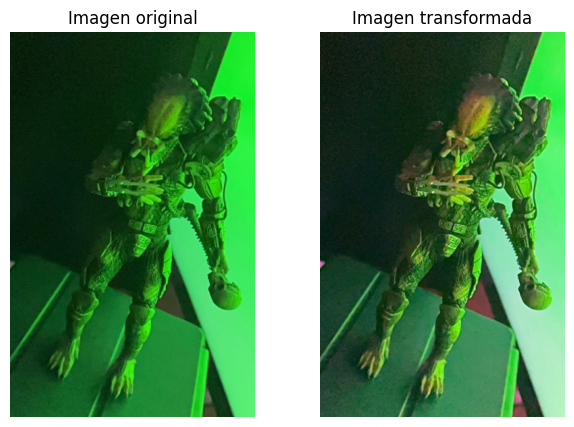

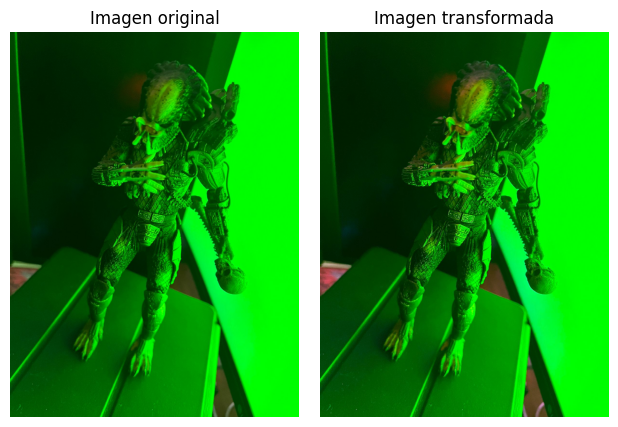

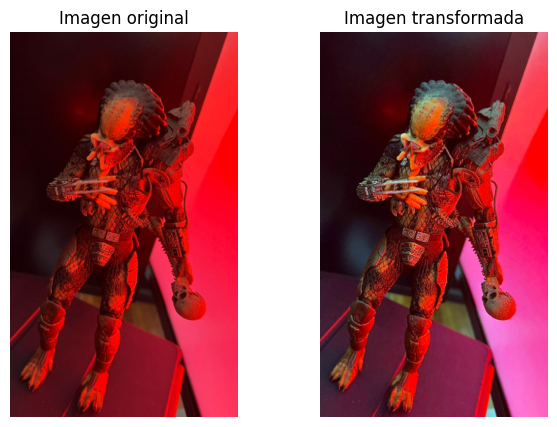

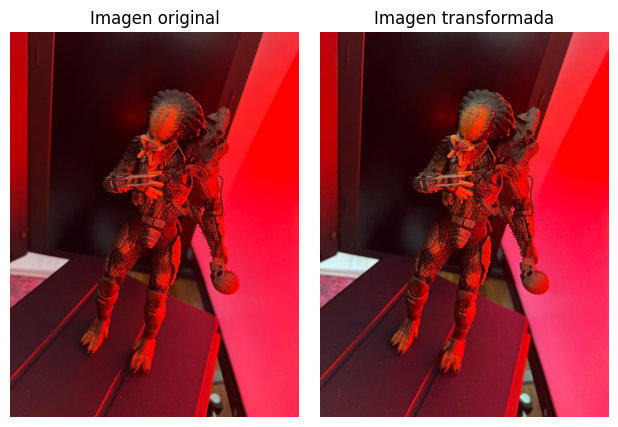

In [6]:
path = 'white_patch'
images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

for image_name in images:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)
    
    if image is not None:
        corrected_image = white_patch(image)
        plot_comparativo(image, corrected_image)


# Parte 2

### Comparar histogramas

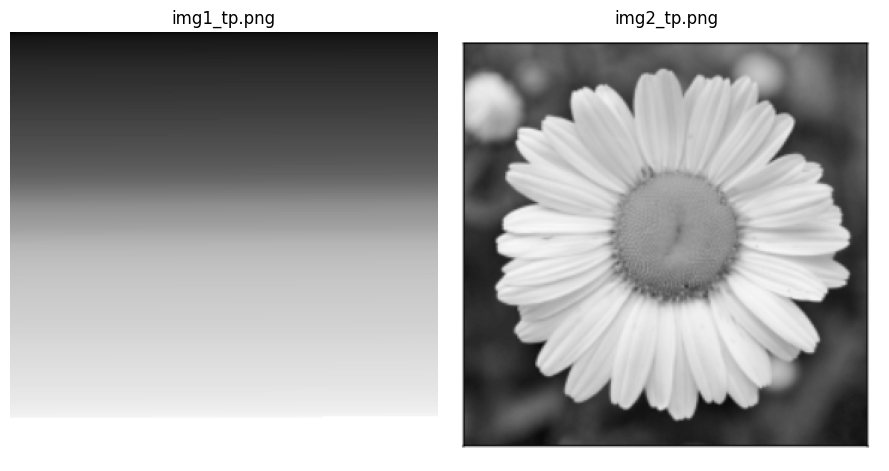

In [7]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2_tp.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].imshow(img1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('img1_tp.png')

ax[1].imshow(img2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('img2_tp.png')

plt.tight_layout()
plt.show()


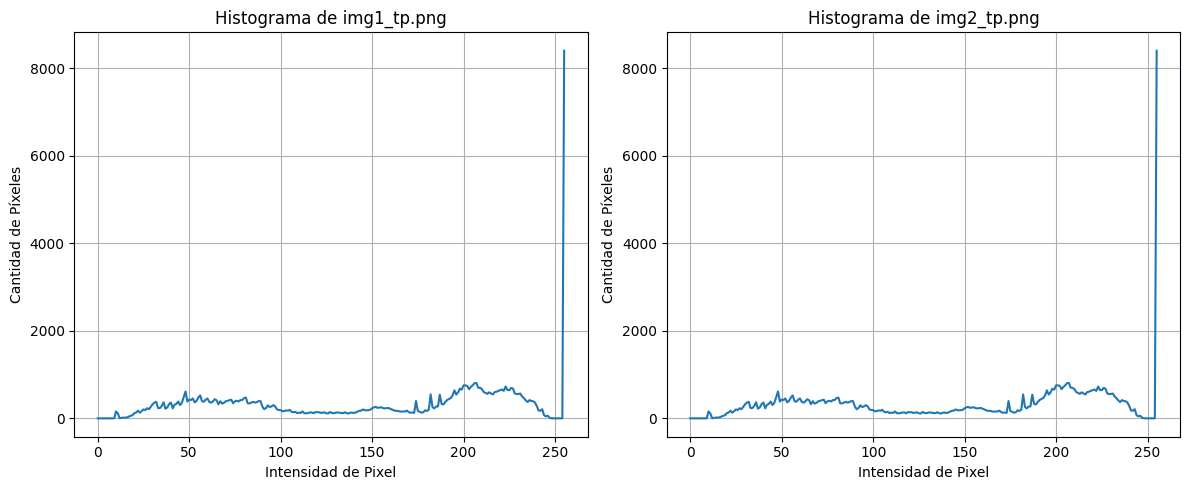

In [8]:
num_bins = 256

hist_img1 = cv2.calcHist([img1], [0], None, [num_bins], [0,256])
hist_img2 = cv2.calcHist([img2], [0], None, [num_bins], [0,256])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(hist_img1)
ax[0].set_title('Histograma de img1_tp.png')
ax[0].set_xlabel('Intensidad de Pixel')
ax[0].set_ylabel('Cantidad de Píxeles')
ax[0].grid(True)

ax[1].plot(hist_img2)
ax[1].set_title('Histograma de img2_tp.png')
ax[1].set_xlabel('Intensidad de Pixel')
ax[1].set_ylabel('Cantidad de Píxeles')
ax[1].grid(True)

plt.tight_layout()
plt.show()


Al comparar los histogramas de img1_tp.png y img2_tp.png, observamos que a pesar de que las imágenes son visualmente distintas en términos de estructura, forma y textura, sus histogramas son notablemente similares. Ambos histogramas muestran distribuciones de intensidad comparables a lo largo del rango de valores de píxeles.


Dicho esto, esta similitud en los histogramas de dos imágenes visualmente diferentes destaca una limitación fundamental de los histogramas como feature. No capturan la disposición espacial ni las relaciones entre píxeles adyacentes en una imagen. Por lo tanto, mientras que los histogramas proporcionan información sobre la distribución de intensidades en una imagen, no ofrecen información sobre patrones, estructuras o texturas.

Si estuviéramos entrenando un modelo de clasificación o detección de imágenes y usáramos solo histogramas como feature, podríamos encontrar dificultades para diferenciar entre imágenes que tienen histogramas similares pero son visualmente diferentes. Por lo tanto, si bien los histogramas pueden ser útiles como una de las features en un conjunto más amplio de features, confiar exclusivamente en ellos podría ser insuficiente, especialmente si las imágenes en el conjunto de datos tienen estructuras o texturas variadas.

Después de este análisis podemos concluir que: mientras que los histogramas pueden ser una característica valiosa en ciertos contextos, no son una representación completa de una imagen. Para tareas de clasificación o detección más complejas, sería mejor opción complementar los histogramas con otras características o utilizar técnicas más avanzadas.

### Segmentación

Se muestra el histograma de los 3 canales (RGB):

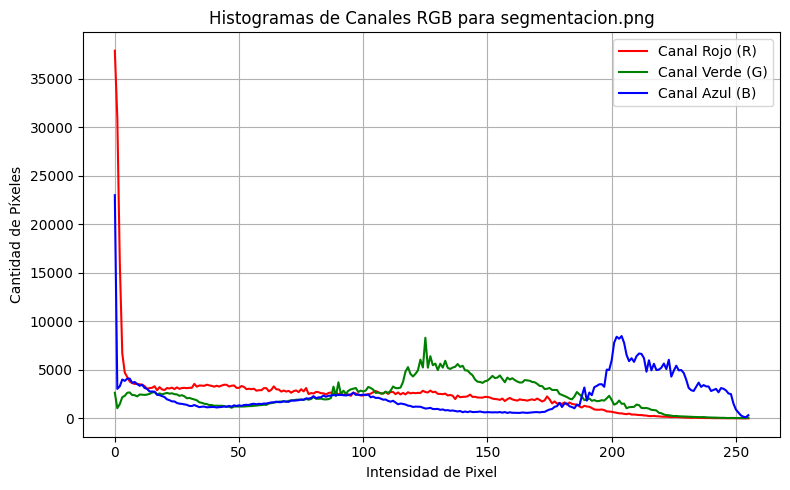

In [9]:
img = cv2.imread('segmentacion.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

num_bins = 256
hist_R = cv2.calcHist([img_rgb], [0], None, [num_bins], [0,256])
hist_G = cv2.calcHist([img_rgb], [1], None, [num_bins], [0,256])
hist_B = cv2.calcHist([img_rgb], [2], None, [num_bins], [0,256])

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(hist_R, color='red', label='Canal Rojo (R)')
ax.plot(hist_G, color='green', label='Canal Verde (G)')
ax.plot(hist_B, color='blue', label='Canal Azul (B)')
ax.set_title('Histogramas de Canales RGB para segmentacion.png')
ax.set_xlabel('Intensidad de Pixel')
ax.set_ylabel('Cantidad de Píxeles')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


El histograma de los canales RGB para la imagen "segmentacion.png" muestra lo siguiente:

Canal Rojo (R): El histograma del canal rojo muestra un pico principal en las intensidades más bajas. Esto sugiere una presencia prominente de tonos rojizos oscuros en la imagen.
No hay un pico significativo en las intensidades más altas, lo que indica la ausencia de tonos rojizos claros en áreas extensas de la imagen.
El resto del histograma para este canal muestra una distribución relativamente uniforme, aunque con una densidad menor de píxeles en las intensidades intermedias.

Canal Verde (G): El histograma del canal verde muestra una distribución más amplia.
Existe un pico prominente en intensidades intermedias, indicando la presencia de tonos verdes medios en la imagen.
Se observan menores picos en las intensidades bajas y altas, lo que sugiere la presencia de tonos verdes tanto oscuros como claros, pero en menor medida en comparación con los tonos medios.

Canal Azul (B): El histograma del canal azul muestra un pico principal en las intensidades más bajas, indicando una presencia significativa de tonos azules oscuros.
Pero a diferencia del canal rojo, hay picos en las intensidades altas, lo que sugiere buena presencia de tonos azules claros en la imagen.
El histograma también presenta una densidad relativamente uniforme de píxeles en las intensidades intermedias.


Estas observaciones sobre los canales RGB indican la complejidad y diversidad de colores en la imagen, lo que nos da una idea de los diferentes elementos y paisajes presentes en ella.

A partir de esta observación, podemos inferir que la imagen tiene áreas con diferentes tonos de colores, lo que podría ayudarnos a segmentar diferentes elementos como agua, cielo y tierra.

Se muestra la imagen original:

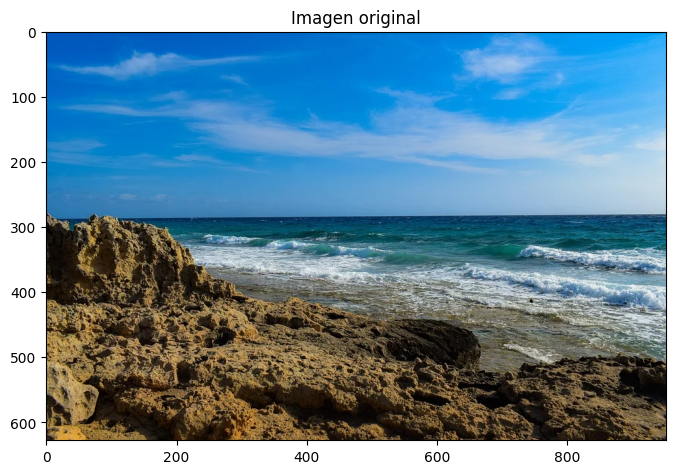

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

Se muestra la dispresión de los pixeles en los 3 canales:

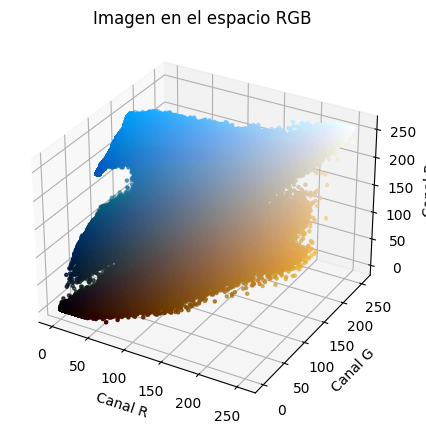

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

R, G, B = cv2.split(img_rgb)

fig = plt.figure(figsize=(5, 5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm = colors.Normalize(vmin=-1,vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title("Imagen en el espacio RGB")
axis.set_xlabel("Canal R")
axis.set_ylabel("Canal G")
axis.set_zlabel("Canal B")
plt.show()

Ahora se analizarán los histogramas de cada canal para poder obtener los valores de umbral para la segmentación:

In [12]:
def plot_histograma(image):
    fig = plt.figure(figsize=(20, 5))

    ax = fig.add_subplot(1, 4, 1)
    ax.imshow(image)

    colores = ('r', 'g', 'b')
    for i in range(3):
        channel = image[:, :, i]
        ax = fig.add_subplot(1, 4, i+2)
        ax.hist(channel.ravel(), 8, [0, 256], color=colores[i])

    plt.show()


Obtengo una muestra de cada zona que quiero segmentar para poder analizar los histogramas de solo esa zona:

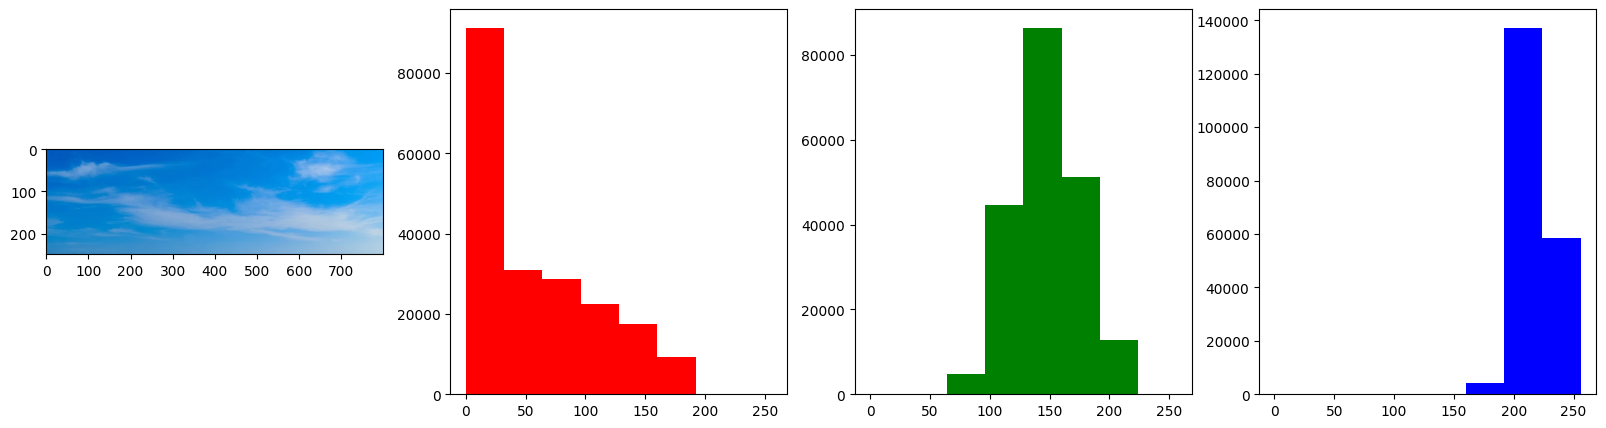

In [13]:
cielo = img_rgb[0:250, 50:850, :]
plot_histograma(cielo)

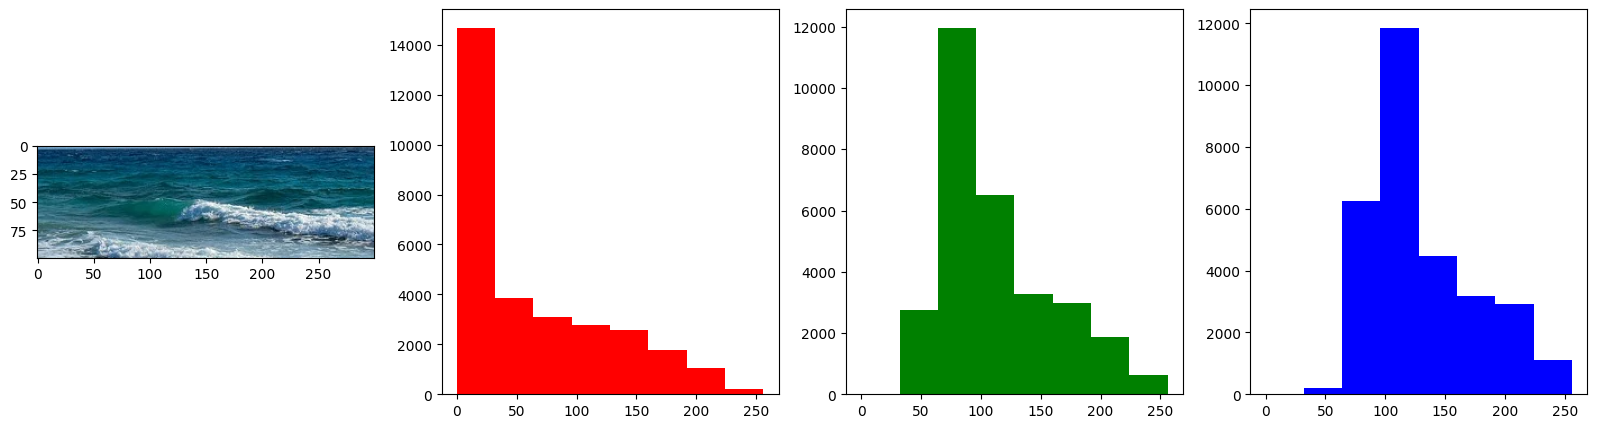

In [14]:
agua = img_rgb[280:380, 600:900, :]
plot_histograma(agua)

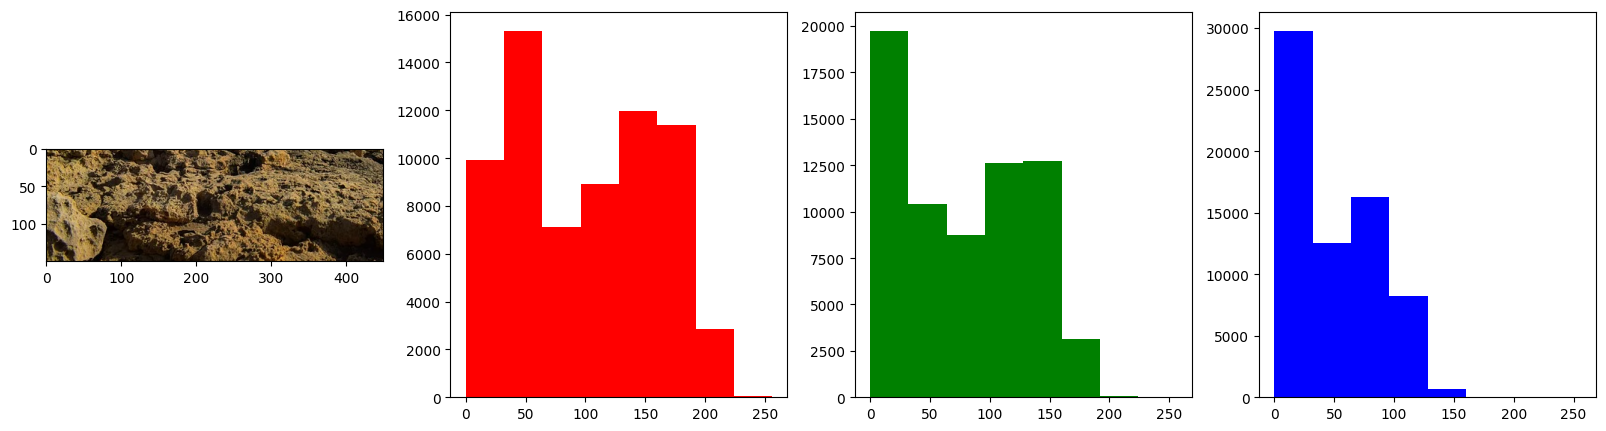

In [15]:
tierra = img_rgb[450:600, 0:450, :]
plot_histograma(tierra)

In [16]:
def plot_segmentacion(image, low_threshold, high_threshold, color = "RGB"):
    if color == "RGB":
        mask = cv2.inRange(image, np.array(low_threshold),  np.array(high_threshold))
        segmented = cv2.bitwise_and(image, image, mask=mask)
    elif color == "HSV":
        image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        mask = cv2.inRange(image_hsv, np.array(low_threshold),  np.array(high_threshold))
        segmented = cv2.bitwise_and(image, image, mask=mask)
        
    fig = plt.figure(figsize=(8, 8*image.shape[1]/image.shape[0]))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(segmented)
    ax.axis('off')


Al observar los histogramas, podemos definir los umbrales para cada canal. Los umbrales elegidos son los siguientes:

In [17]:
low_threshold_cielo = [0, 80, 185]
high_threshold_cielo = [160, 200, 255]

low_threshold_agua = [0, 30, 60]
high_threshold_agua = [100, 165, 160]

low_threshold_tierra = [0, 0, 0]
high_threshold_tierra = [200, 150, 75]

Ahora se aplicará la segmentación a la imagen:

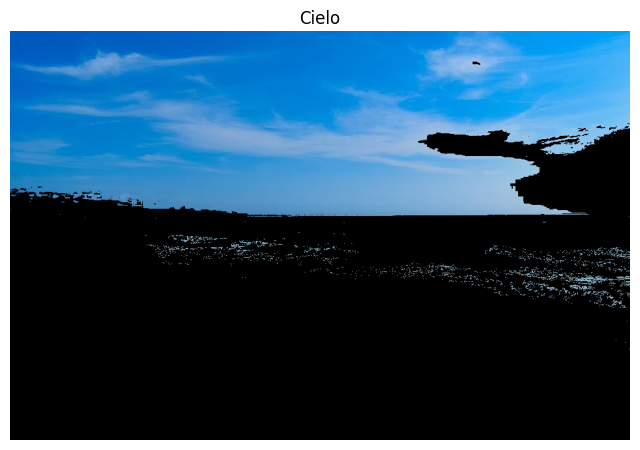

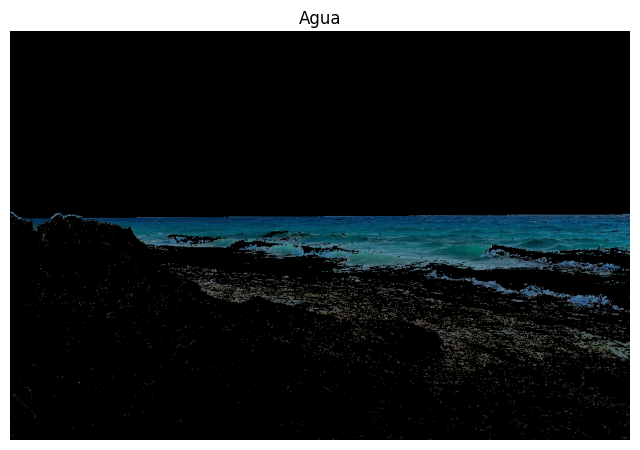

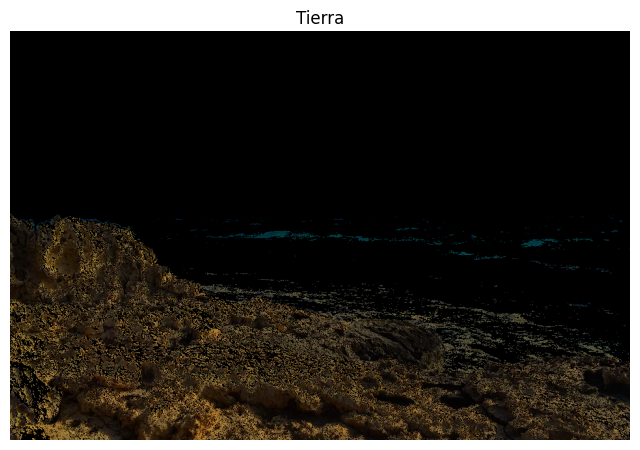

In [18]:
plot_segmentacion(img_rgb, low_threshold_cielo, high_threshold_cielo)
plt.title("Cielo")

plot_segmentacion(img_rgb, low_threshold_agua, high_threshold_agua)
plt.title("Agua")

plot_segmentacion(img_rgb, low_threshold_tierra, high_threshold_tierra)
plt.title("Tierra")
plt.show()

Los resultados obtenidos aplicando segmentación en espacio RGB son decentes; sin embargo, podrían ser mejores. Ahora se aplicarán en el espacio HSV para ver si se obtienen mejores resultados.

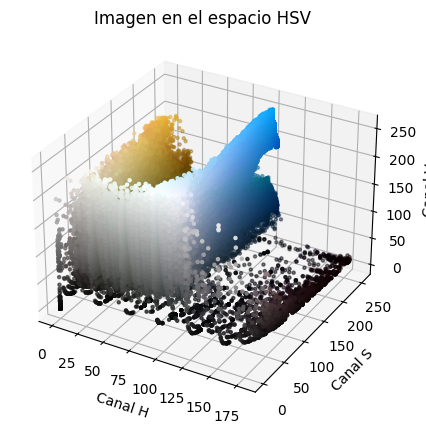

In [19]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(img_hsv)


fig = plt.figure(figsize=(5, 5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors_hsv = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm_hsv = colors.Normalize(vmin=-1., vmax=1.)
norm_hsv.autoscale(pixel_colors_hsv)
pixel_colors_hsv = norm_hsv(pixel_colors_hsv).tolist()

axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colors_hsv, marker=".")
axis.set_title("Imagen en el espacio HSV")
axis.set_xlabel("Canal H")
axis.set_ylabel("Canal S")
axis.set_zlabel("Canal V")
plt.show()

Como se observa, el gráfico 3D es muy distinto al del RGB, tienen un enfoque muy diferente. Analizando el gráfico se aprecian los colores muy bien separados, esto se debe a que el canal H se concentra solo en el color, por ende se puede hacer un análisis más simple, ya que vamos a prestar atención casi exclusivamente al canal H, y solo se tomarán en cuenta los demás canales para un ajuste más fino.

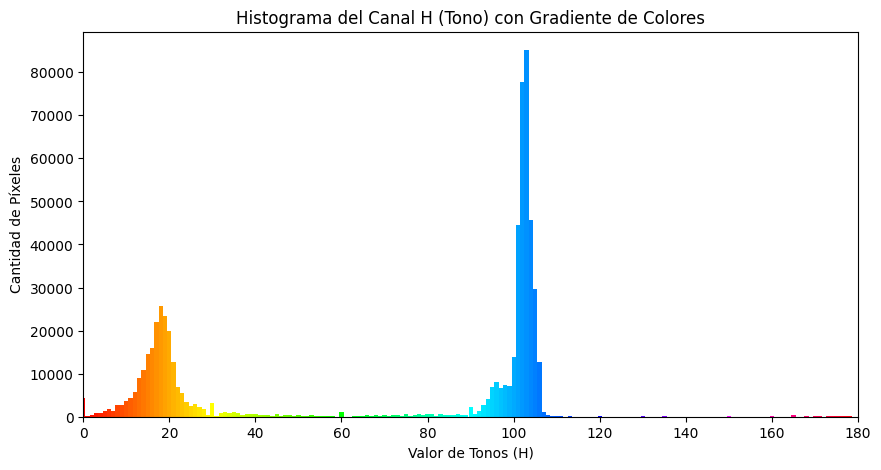

In [20]:
histograma_H, bin_edges_H = np.histogram(H, bins=180, range=(0, 180))

colores_gradiente = [colors.hsv_to_rgb((i/180, 1, 1)) for i in range(180)]

plt.figure(figsize=(10, 5))
plt.bar(bin_edges_H[:-1], histograma_H, width=1, color=colores_gradiente)
plt.xlim([0, 180])
plt.xlabel('Valor de Tonos (H)')
plt.ylabel('Cantidad de Píxeles')
plt.title('Histograma del Canal H (Tono) con Gradiente de Colores')
plt.show()


Analizando el histograma del canal H, podemos definir los umbrales:

In [21]:
low_threshold_cielo = [100, 0, 150]
high_threshold_cielo = [110, 255, 255]

low_threshold_agua = [36, 0, 0]
high_threshold_agua = [99, 255, 255]

low_threshold_tierra = [0, 0, 0]
high_threshold_tierra = [35, 255, 255]

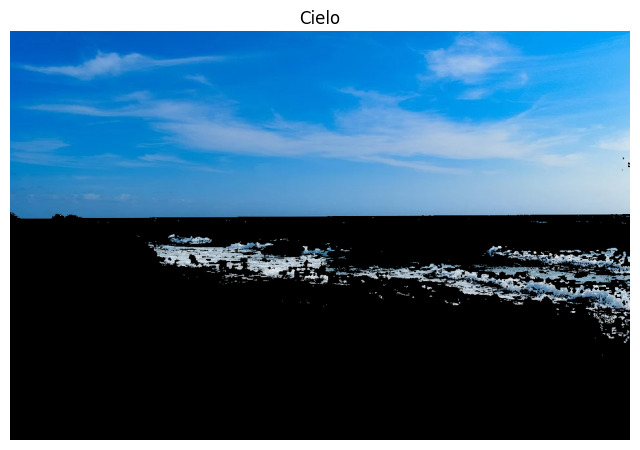

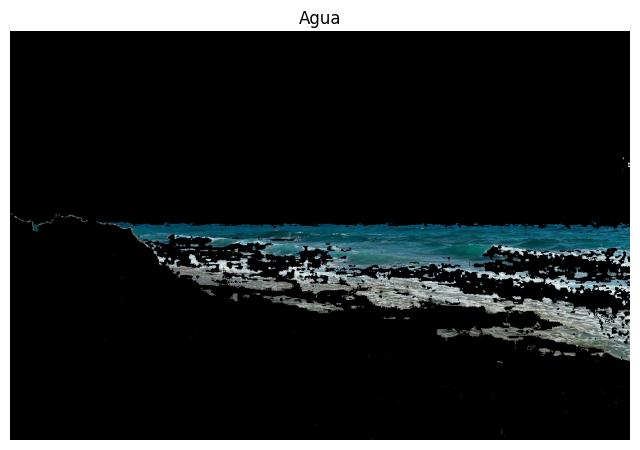

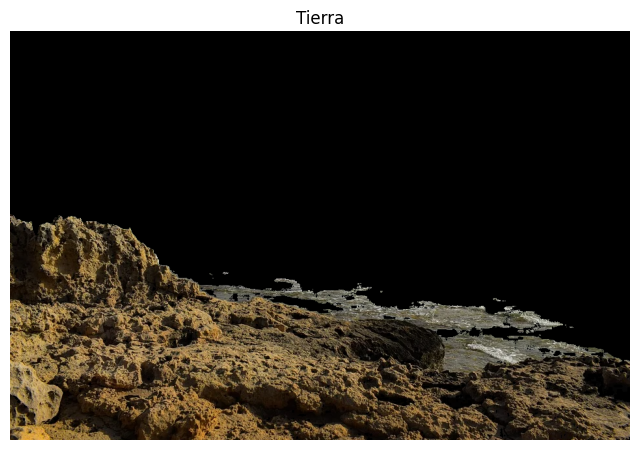

In [22]:
plot_segmentacion(img_rgb, low_threshold_cielo, high_threshold_cielo, "HSV")
plt.title("Cielo")

plot_segmentacion(img_rgb, low_threshold_agua, high_threshold_agua, "HSV")
plt.title("Agua")

plot_segmentacion(img_rgb, low_threshold_tierra, high_threshold_tierra, "HSV")
plt.title("Tierra")
plt.show()

Observando lo obtenido en la segmentación aplicada a la imagen en HSV, vemos que el resultado es mejor que el de RGB, ya que se ha hecho una mejor distinción de colores.